In [15]:
import matplotlib as mpl
import numpy as np
mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In [16]:
import pandas as pd
import re 
summary_data = pd.read_pickle('data.nosync/summary.pickle')

In [22]:
model_path = "src/validation/Model LinearRegression(copy_X=True, fit_intercept=True, n_jobs='-1', normalize=True)"
test_data_path = './data.nosync/train_processed.h5'
test_data = pd.read_hdf(test_data_path, key='table')

with open(model_path, 'rb') as file:  
    model = pickle.load(file)

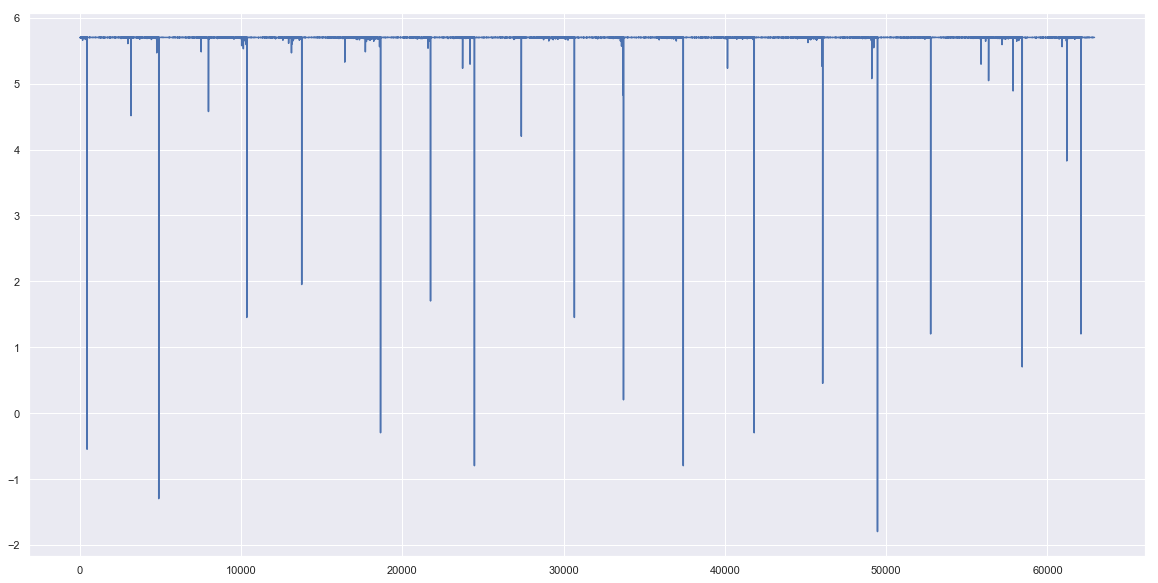

In [23]:
plt.figure(figsize=(20, 10))
# plt.plot(df_processed['ttf'], 'k')
plt.plot(model.predict(test_data.drop('ttf', axis=1)))
plt.show()

Find all columns with score

In [24]:
metrics_columns = [f for f in summary_data.columns if not re.match(r"(?:fold|model|data|preproc)", f)]
features_columns = [f for f in summary_data.columns if re.match(r"(?:fold|model|data|preproc)", f)]
print(metrics_columns, features_columns)

['mean_absolute_error', 'mean_squared_error'] ['data_fname', 'preproc_name', 'preproc_params', 'folds_name', 'folds_params', 'model_name', 'model_params']


Find mean, max, min, std for metrics

In [25]:
%time
for k in metrics_columns:
    summary_data[str(k) + "_mean"] = summary_data[str(k)].apply(pd.Series).mean(axis=1)
    summary_data[str(k) + "_min"] = summary_data[str(k)].apply(pd.Series).min(axis=1)
    summary_data[str(k) + "_max"] = summary_data[str(k)].apply(pd.Series).max(axis=1)
    summary_data[str(k) + "_std"] = summary_data[str(k)].apply(pd.Series).std(axis=1)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 19.3 µs


In [27]:
summary_data

,data_fname,preproc_name,preproc_params,folds_name,folds_params,model_name,model_params,mean_absolute_error,mean_squared_error,mean_absolute_error_mean,mean_absolute_error_min,mean_absolute_error_max,mean_absolute_error_std,mean_squared_error_mean,mean_squared_error_min,mean_squared_error_max,mean_squared_error_std
0,../../data.nosync/train_processed.h5,None,None,KFold,"{'name': 'KFold', 'n_splits': 4}",LinearRegression,"{'name': 'LinearRegression', 'normalize': True...","[3.3537072422898375, 3.1196646465886815, 2.665...","[15.292208376317124, 15.530965907416958, 9.727...",3.058754,2.665661,3.353707,0.286715,13.602456,9.727904,15.530966,2.686525


In [7]:
summary_data['mean_absolute_error']

0    [3.3537072422898375, 3.1196646465886815, 2.665...
Name: mean_absolute_error, dtype: object

combine model's detail in one column

In [8]:
def unit_data(x):
    x_all = ''
    for x_i in x:
        if x_i != 'nan':
            x_all += x_i
            x_all += '\n'
    return x_all        

In [9]:
summary_data['label'] = summary_data[features_columns].astype(str).apply(unit_data,1)

sort dataframe by mean value

In [10]:
sort_summary_data = summary_data.sort_values(by=['mean_squared_error_mean'], ascending=True)

# MAE metric 

In [11]:
metric_mae = sort_summary_data['mean_absolute_error'].apply(pd.Series).fillna(0).values
r_metric_mae = [list(x) for x in zip(*metric_mae)]

/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0]), <a list of 1 Text xticklabel objects>)

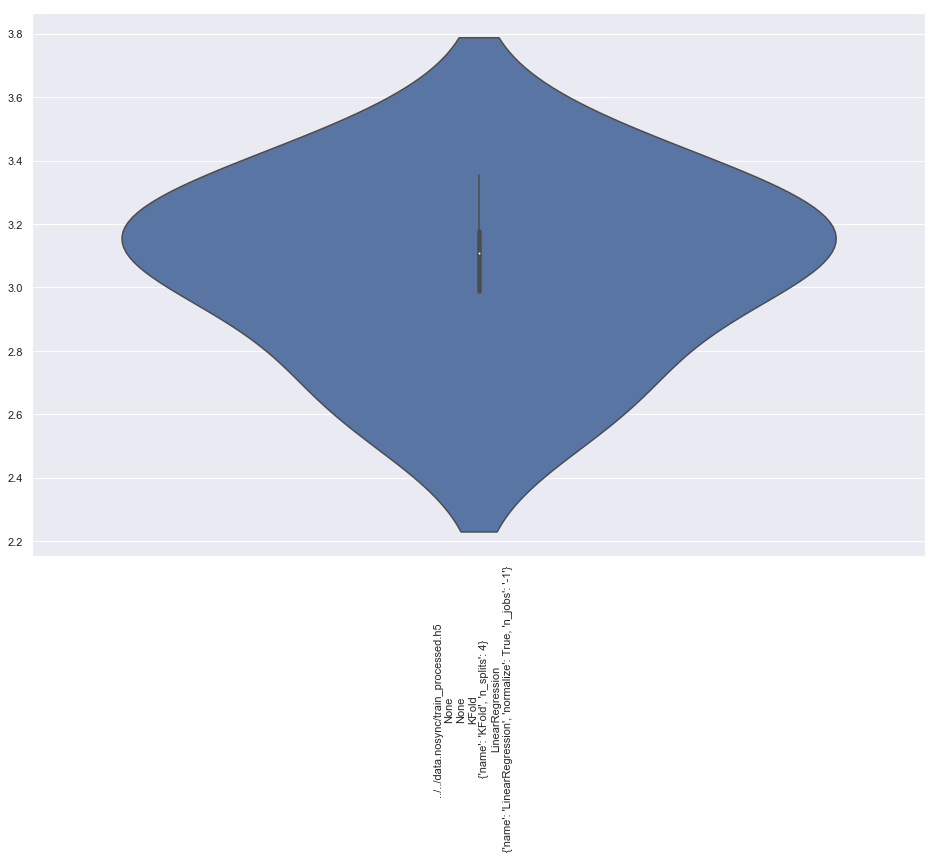

In [12]:
sns.set(rc={'figure.figsize':(16,10)})
# Show each distribution with violins
ax = sns.violinplot(data=np.array(r_metric_mae))
ax.set_xticklabels(sort_summary_data['label'].values)
plt.xticks(rotation=90)

# RMSE metric 

In [ ]:
metric_rmse = sort_summary_data['mean_squared_error'].apply(pd.Series).fillna(0).values
r_metric_rmse = [list(x) for x in zip(*metric_rmse)]

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
# Show each distribution with violins
ax = sns.violinplot(data=np.array(r_metric_rmse))
ax.set_xticklabels(sort_summary_data['label'].values)
plt.xticks(rotation=90)